# GLES Most Important Issues

So, GLES has many components. Component 8 is the quarterly online panel, which is probably what we want. There is some examples of using this data here:
https://github.com/euagendas/text_classification/blob/master/analysis/Short_version_C8_Longterm_Tracking_online.ipynb
Timo is a great point of contact for GLES questions.
also https://drive.google.com/drive/folders/1DnTC698DlfUnmTv1brYes76ZMyIXbn55
- document this to evernote.

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import entropy

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.figsize'] = [7,8]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 200

mpl.rcParams['font.size'] = 17
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['lines.markersize'] = 10

sns.set_context('talk')

from pprint import pprint

import imp

In [2]:
issues_over_time = pd.read_csv('GLES_issues_over_time.csv')

from dateutil.parser import parse
issues_over_time['start_of_wave'] = issues_over_time['start_of_wave'].apply(parse)

del issues_over_time['politics']
del issues_over_time['polity']

issues_over_time.head()

,start_of_wave,budget and debt,currency and euro,economy,education,environment,family policy,foreign policy (defense),foreign policy (europe),general fiscal policy,general social policy,health care and pensions,infrastructure,labor market,law and order,migration and integration,taxes
0,2009-04-30,65,0,756,75,20,46,14,8,24,161,82,10,650,67,76,125
1,2009-05-27,52,0,374,32,7,22,6,6,21,98,34,4,314,32,32,77
2,2009-07-03,0,0,14,40,5,0,0,0,0,0,0,5,0,1,0,0
3,2009-07-31,0,0,1,32,29,0,0,0,0,0,0,22,0,5,0,0
4,2009-08-24,66,0,371,42,6,36,12,1,7,110,63,5,425,35,26,55


In [3]:
MII_to_supertopics = {
'budget and debt' : 'Macroeconomic Policy',
'currency and euro' : 'Macroeconomic Policy',
'economy' : 'Macroeconomic Policy',
'education' : 'Social Policy',
'environment' : 'Environment and Natural Resources',
'family policy' : 'Social Policy',
'foreign policy (defense)' : 'Foreign Affairs and Defense',
'foreign policy (europe)' : 'Foreign Affairs and Defense',
'general fiscal policy' : 'Macroeconomic Policy',
'general social policy' : 'Social Policy',
'health care and pensions' : 'Social Policy',
'infrastructure' : 'Macroeconomic Policy',
'labor market' : 'Macroeconomic Policy',
'law and order' : 'Law, Order, and Civil Rights',
'migration and integration' : 'Law, Order, and Civil Rights',
'taxes' : 'Macroeconomic Policy'
}

In [4]:
new_keys = [ MII_to_supertopics[k] for k in issues_over_time.keys()[1:] ]

superissues_table = pd.DataFrame()

for k in issues_over_time.keys()[1:]:
    new_k = MII_to_supertopics[k]
    
    if new_k not in superissues_table.keys():
        superissues_table[new_k]  = issues_over_time[k]    
    else:
        superissues_table[new_k] += [ i if i>0 else 0 for i in issues_over_time[k] ]

superissues_table['start_of_wave'] = issues_over_time['start_of_wave']

superissues_table.to_csv('GLES_superissues_table.csv')
superissues_table.head()

,Macroeconomic Policy,Social Policy,Environment and Natural Resources,Foreign Affairs and Defense,"Law, Order, and Civil Rights",start_of_wave
0,1630,364,20,22,143,2009-04-30
1,842,186,7,12,64,2009-05-27
2,19,40,5,0,1,2009-07-03
3,23,32,29,0,5,2009-07-31
4,929,251,6,13,61,2009-08-24


In [5]:
issues_over_time = pd.read_csv('GLES_superissues_table.csv', index_col=0)

from dateutil.parser import parse
issues_over_time['start_of_wave'] = issues_over_time['start_of_wave'].apply(parse)

issues_over_time.head()

,Macroeconomic Policy,Social Policy,Environment and Natural Resources,Foreign Affairs and Defense,"Law, Order, and Civil Rights",start_of_wave
0,1630,364,20,22,143,2009-04-30
1,842,186,7,12,64,2009-05-27
2,19,40,5,0,1,2009-07-03
3,23,32,29,0,5,2009-07-31
4,929,251,6,13,61,2009-08-24


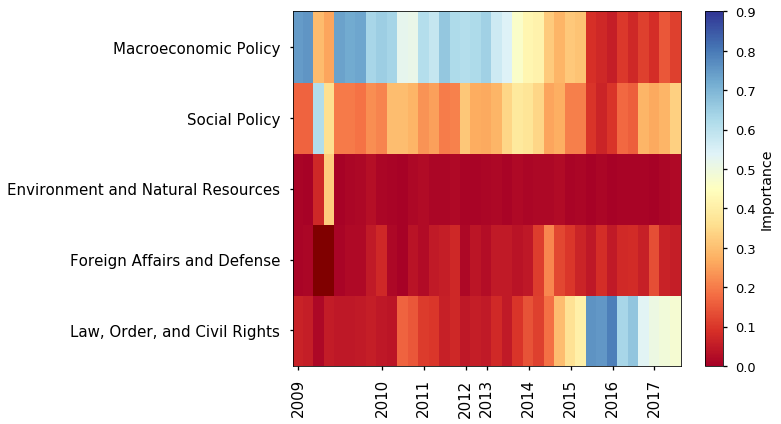

In [6]:
table = issues_over_time
M = table.loc[:, table.columns != 'start_of_wave'].as_matrix()

normM = []
for m in M:
    if sum(m)>0:
        normM += [ list(m/sum(m)) ]
    else:
        normM += [ list(m) ]
normM = np.array(normM)

fig, ax = plt.subplots(1, figsize=(11,6))

Mshow = np.flipud(normM.T)
Mshow[Mshow==0.0] = -1

pc = plt.pcolor(Mshow, cmap='RdYlBu')

#pc.cmap.set_under('rosybrown')
pc.cmap.set_under('maroon')
pc.set_clim(0,0.9)

c = plt.colorbar()
c.set_label('Importance')

keys = table.loc[:, table.columns != 'start_of_wave'].keys()
yticks = np.arange(len(keys))+0.5
yticklabels = keys[::-1]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels, fontsize=15)
#ax.set_ylabel('Issues')

#xticks = np.arange(0,len(M),4)
#xticklabels = [ str(i) for i in np.arange(1985,2020,5) ]

xticks = np.arange(len(M))+0.5
allyears = np.array([i.year for i in table.start_of_wave ])
xticks = xticks[np.array([np.where(allyears==y)[0][0] for y in range(2009,2018)])]
xticklabels = range(2009,2018)

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=90, fontsize=15)
#ax.set_xlabel('Months')

plt.tight_layout()
plt.savefig('images/GLES-Superissues-per-quarter.png', dpi=200)
plt.show()

In [7]:
# Scrambles the array and removes top issue
def remove_top(v):
    return np.array(sorted(v)[:-1])

In [8]:
table = issues_over_time

all_entropies = []
n_issues = []

for index, row in table.iterrows():
    topic_array = np.array(row.values[:-1],dtype=np.float64)
    all_entropies += [ entropy(topic_array) ]
    n_issues      += [ sum(row.values[:-1]>0) ]

all_entropies = np.array(all_entropies)
n_issues      = np.array(n_issues)

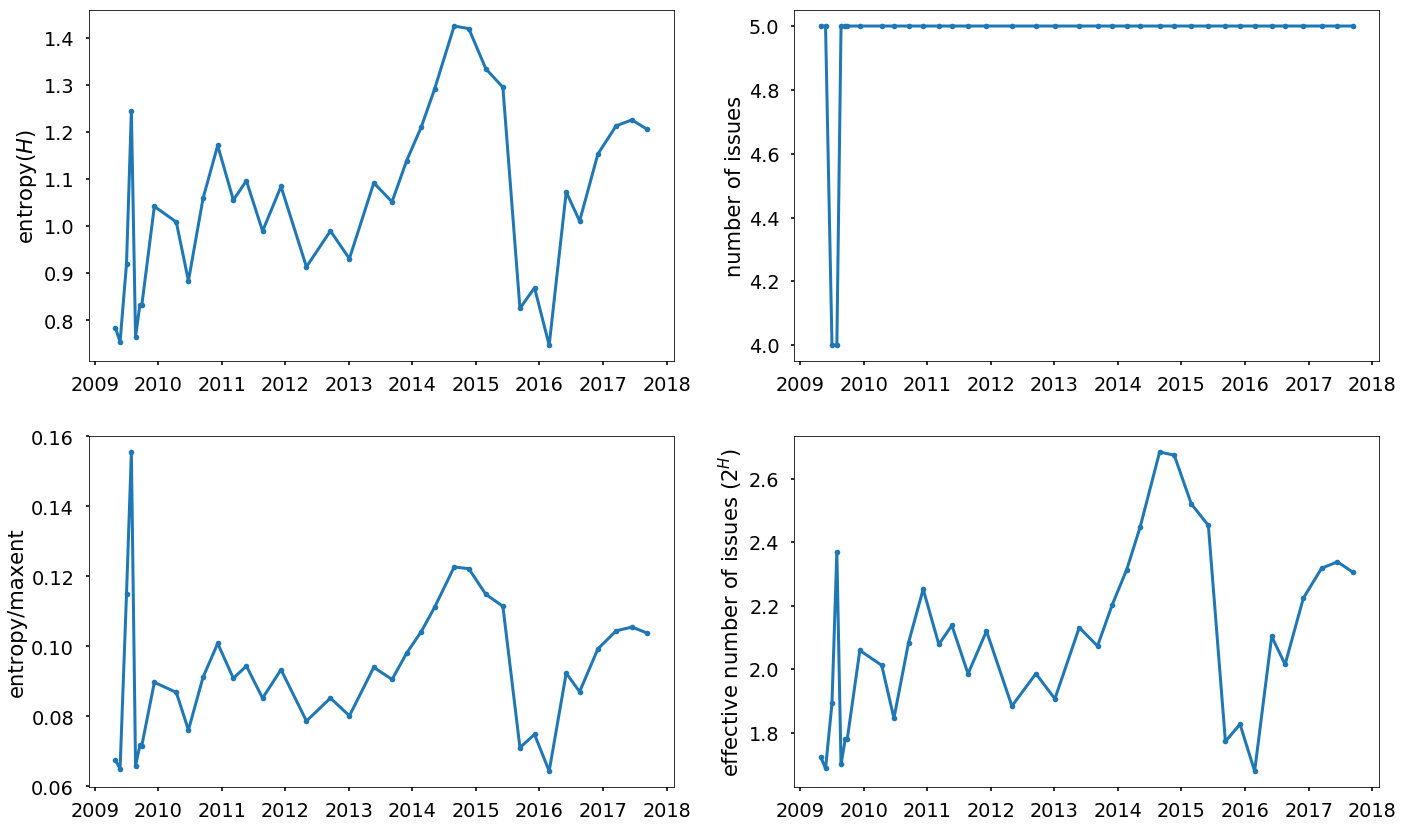

In [9]:
sns.set_context('poster', rc={"lines.linewidth": 3}, font_scale=1.2)

fig, axs = plt.subplots(2,2,figsize=(20,12))
axs = [ axs[0,0], axs[0,1], axs[1,0], axs[1,1] ]

ys = [ [ s                if n>0 else -np.inf for s,n in zip(all_entropies, n_issues) ],
       [ n                if n>0 else -np.inf for s,n in zip(all_entropies, n_issues) ],
       [ s/(n*np.log2(n)) if n>0 else -np.inf for s,n in zip(all_entropies, n_issues) ],
       [ 2**s             if n>0 else -np.inf for s,n in zip(all_entropies, n_issues) ]
     ]


#xticks = np.arange(0,35*12,5*12)
#xticklabels = [ str(i) for i in np.arange(1985,2020,5) ]

ylabels = ['entropy($H$)', 'number of issues', 'entropy/maxent', r'effective number of issues ($2^H$)']
for ax,y,ylabel in zip(axs,ys,ylabels):
    ax.plot(table.start_of_wave, y, '.-')
    ax.set_ylabel(ylabel)
    #ax.set_xticks(xticks)
    #ax.set_xticklabels(xticklabels)
    
plt.tight_layout()
plt.savefig('images/Superissues-entropy.png', dpi=200)
plt.show()

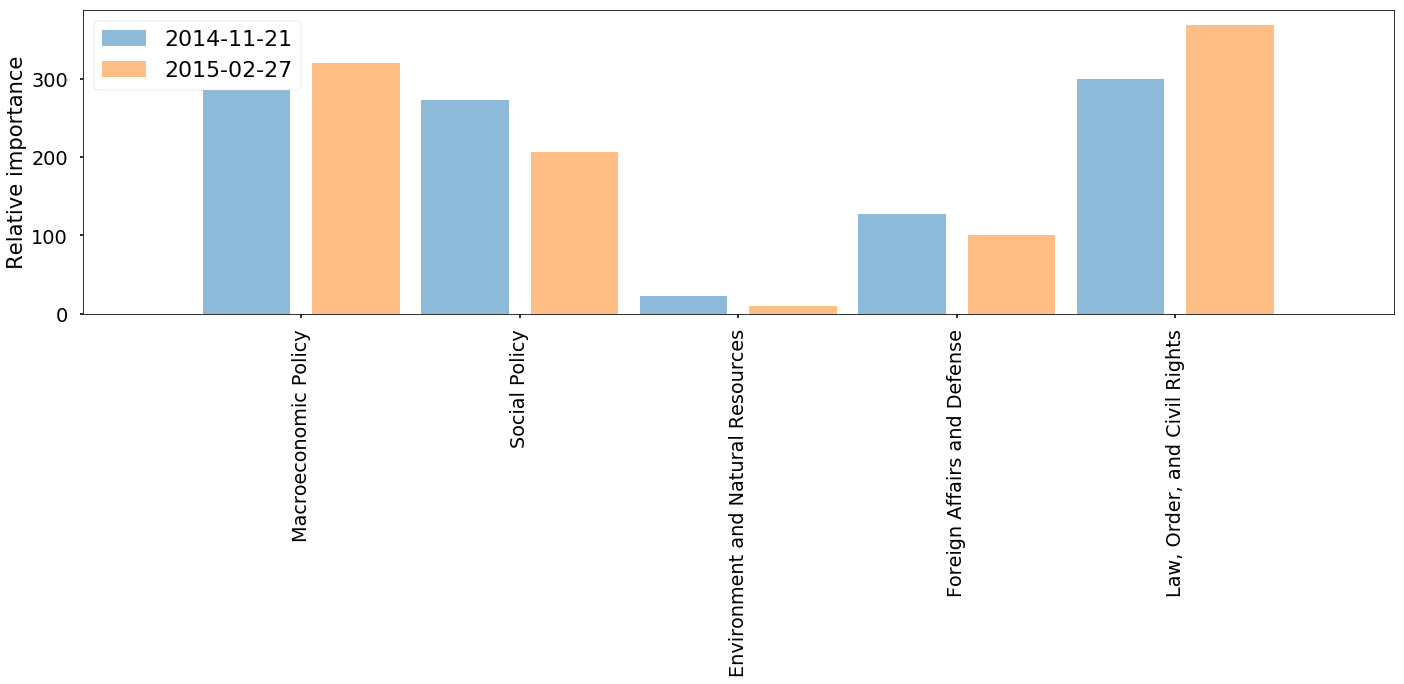

In [10]:
keys = table.keys()[:-1]

i1 = 25
i2 = 26

y1 = np.array(table.iloc[i1].values[:-1],dtype=np.float64)
y2 = np.array(table.iloc[i2].values[:-1],dtype=np.float64)

fig, ax = plt.subplots(1, figsize=(20,10))

x = np.arange(len(keys))
ax.bar(2*x-1, y1, alpha=0.5, label=str(table.loc[i1].start_of_wave.date()))
ax.bar(2*x,   y2, alpha=0.5, label=str(table.loc[i2].start_of_wave.date()))

ax.set_xticks(2*x-0.5)
ax.set_xticklabels(keys, rotation=90)
ax.set_xlim(-2.5,2*len(x)-0.5)
#ax.set_xlabel('Issues')
ax.set_ylabel('Relative importance')
plt.legend(fontsize=22)

plt.tight_layout()
plt.savefig('images/Superissues-two-quarters.png', dpi=200)
plt.show()

In [11]:
from numpy.linalg import norm
from scipy.stats import entropy
from scipy.spatial.distance import hamming
from scipy.spatial.distance import euclidean
from sklearn.metrics import mutual_info_score

def rel_entr(p, q, ep=0.01, fill_all_zeros=True):
    if fill_all_zeros is True:
        P = [ i if i > 0 else ep for i in p ]
        Q = [ i if i > 0 else ep for i in q ]
        return entropy(P,Q)
    
    else:
        P = []
        Q = []
        for i in range(len(p)):
            
            if p[i] == 0:
                if q[i] != 0:
                    P += [ep]
                    Q += [q[i]]
                else: # q[i] == 0
                    P += [p[i]]
                    Q += [q[i]]
                    continue
                    
            else:# p[i] != 0
                if q[i] != 0:
                    P += [p[i]]
                    Q += [q[i]]
                else: # q[i] == 0
                    P += [p[i]]
                    Q += [ep]
                    
        return entropy(P,Q)


def JSD(P, Q,ep=0.01, fill_all_zeros=True):
    _P = P / norm(P, ord=1)
    _Q = Q / norm(Q, ord=1)
    _M = 0.5 * (_P + _Q)
    return 0.5 * (rel_entr(_P, _M,ep=ep,fill_all_zeros=fill_all_zeros) + rel_entr(_Q, _M,ep=ep,fill_all_zeros=fill_all_zeros))


def BCD(P,Q):
    _P = np.array(P / norm(P, ord=1),dtype=np.float32)
    _Q = np.array(Q / norm(Q, ord=1),dtype=np.float32)
    BC = np.dot(np.sqrt(_P),np.sqrt(_Q))
    
    return -np.log2(BC)    


def MI(_P,_Q):
    return mutual_info_score(_P,_Q)


def novelty(p,q,metric='KL', ep=0.01, faz=True):
    
    if metric=='KL':
        return rel_entr(p,q,ep=ep,fill_all_zeros=faz)
    elif metric=='hamming':
        return hamming(p>0,q>0)
    elif metric=='euclidean':
        return euclidean(p,q)
    elif metric=='JSD':
        return JSD(p,q,ep=ep,fill_all_zeros=faz)
    elif metric=='BCD':
        return BCD(p,q)
    elif metric=='MI':
        return MI(p,q)
    else:
        return 0

## 1 - Make entropy plots

In [12]:
windowsize = 1

table = issues_over_time.copy()

# Removed issue that was introduced(?) in 2012
#del table['currency and euro']

issues_tplus1 = table[table.index>=table.index[windowsize]]

eps = [0.001, 0.01, 0.1, 0.2]
KLs_faz_True = {}
KLs_faz_False = {}
hammings = {}
JSDs = {}
BCDs = {}
MIs = {}

for ep in eps:
    relative_entropies_True = []
    relative_entropies_False = []
    relative_entropies_hamm = []
    jensen = []
    bhatta = []
    mutual = []
      
    for index, row in issues_tplus1.iterrows():

        y1 = table.loc[index-windowsize:index-1, ~table.columns.isin(['start_of_wave'])].mean().values
        y2 = np.array(row.values[:-1])        
        
        relative_entropies_True  += [ novelty(y2, y1, metric='KL', ep=ep, faz=True) ]
        relative_entropies_False += [ novelty(y2, y1, metric='KL', ep=ep, faz=False) ]
        relative_entropies_hamm  += [ novelty(y2, y1, metric='hamming') ]
        jensen += [ novelty(y2, y1, metric='JSD', ep=ep, faz=False) ]
        bhatta += [ novelty(y2, y1, metric='BCD') ]
        mutual += [ novelty(y2, y1, metric='MI')/novelty(y1, y1, metric='MI') ]

    KLs_faz_True[ep]  = relative_entropies_True
    KLs_faz_False[ep] = relative_entropies_False
    hammings[ep]      = relative_entropies_hamm
    JSDs[ep]          = jensen
    BCDs[ep]          = bhatta
    MIs[ep]           = mutual  

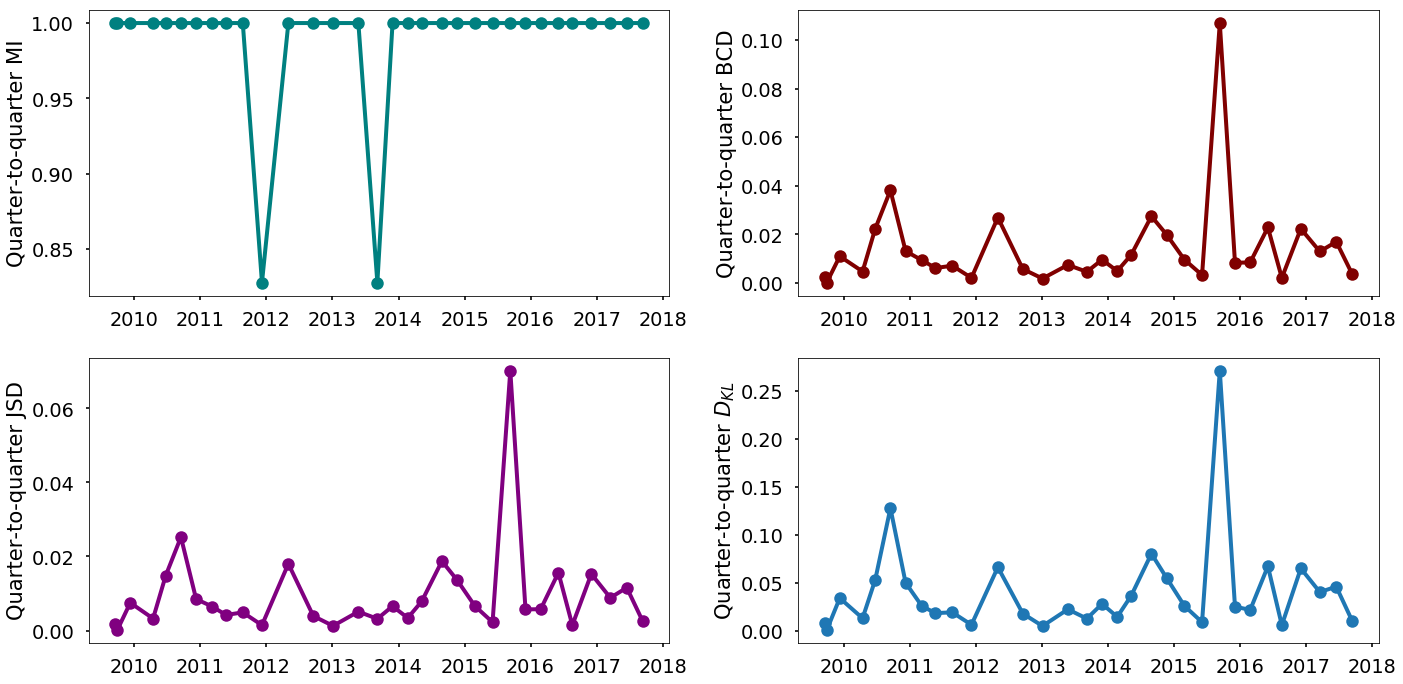

In [13]:
sns.set_context('poster',font_scale=1.2)

start = 4
windowsize = 1

fig, axs = plt.subplots(2,2, figsize=(20,10))
axs = axs.reshape(axs.size,)

indices = table.start_of_wave[windowsize:]
ep = 0.001

# Normalised mutual Information
ax = axs[0]
ax.plot(indices[start:], MIs[ep][start:], '.-', c='teal', lw=4, ms=25)
ax.set_ylabel(r'Quarter-to-quarter MI')

#Bhattacharya distance
ax = axs[1]
ax.plot(indices[start:], BCDs[ep][start:], '.-', c='maroon', lw=4, ms=25)
ax.set_ylabel(r'Quarter-to-quarter BCD')

# JSDs:
ax = axs[2]
ax.plot(indices[start:], JSDs[ep][start:], '.-', c='purple', lw=4, ms=25)
ax.set_ylabel(r'Quarter-to-quarter JSD')
#ax.set_ylim(-0.1,1.1)

# Fill all zeros = False:
ax = axs[3]
ax.plot(indices[start:], KLs_faz_False[ep][start:], '.-', lw=4, ms=25)
ax.set_ylabel(r'Quarter-to-quarter $D_{KL}$')

# Fill all zeros = True:
#ax = axs[4]
#ax.plot(indices[start:], KLs_faz_True[ep][start:], '.-', c='#d62728')
#ax.set_ylabel(r'Quarter-to-year $D_{KL}$')
#ax.set_ylim(-0.1,2)

# Hamming distance
#ax = axs[5]
#ax.plot(indices[start:], hammings[ep][start:], '.-', c='g')
#ax.set_ylabel(r'Quarter-to-year Hamming')

plt.tight_layout()
plt.savefig('images/Superissues-divergence-quarter-to-quarter.png', dpi=200)
plt.show()

## Rough quarter-to-year comparison
Let's get the divergence metrics between a distribution and the last 4 waves.

In [14]:
windowsize = 4

# Removed issue that was introduced(?) in 2012
table = issues_over_time.copy()
#del table['currency and euro']

issues_tplus1 = table[table.index>=table.index[windowsize]]

eps = [0.001, 0.01, 0.1, 0.2]
KLs_faz_True = {}
KLs_faz_False = {}
hammings = {}
JSDs = {}
BCDs = {}
MIs = {}

for ep in eps:
    relative_entropies_True = []
    relative_entropies_False = []
    relative_entropies_hamm = []
    jensen = []
    bhatta = []
    mutual = []
      
    for index, row in issues_tplus1.iterrows():

        y1 = table.loc[index-windowsize:index-1, ~table.columns.isin(['start_of_wave'])].mean().values
        y2 = np.array(row.values[:-1])        
        
        relative_entropies_True  += [ novelty(y2, y1, metric='KL', ep=ep, faz=True) ]
        relative_entropies_False += [ novelty(y2, y1, metric='KL', ep=ep, faz=False) ]
        relative_entropies_hamm  += [ novelty(y2, y1, metric='hamming') ]
        jensen += [ novelty(y2, y1, metric='JSD', ep=ep, faz=False) ]
        bhatta += [ novelty(y2, y1, metric='BCD') ]
        mutual += [ novelty(y2, y1, metric='MI')/novelty(y1, y1, metric='MI') ]

    KLs_faz_True[ep]  = relative_entropies_True
    KLs_faz_False[ep] = relative_entropies_False
    hammings[ep]      = relative_entropies_hamm
    JSDs[ep]          = jensen
    BCDs[ep]          = bhatta
    MIs[ep]           = mutual  

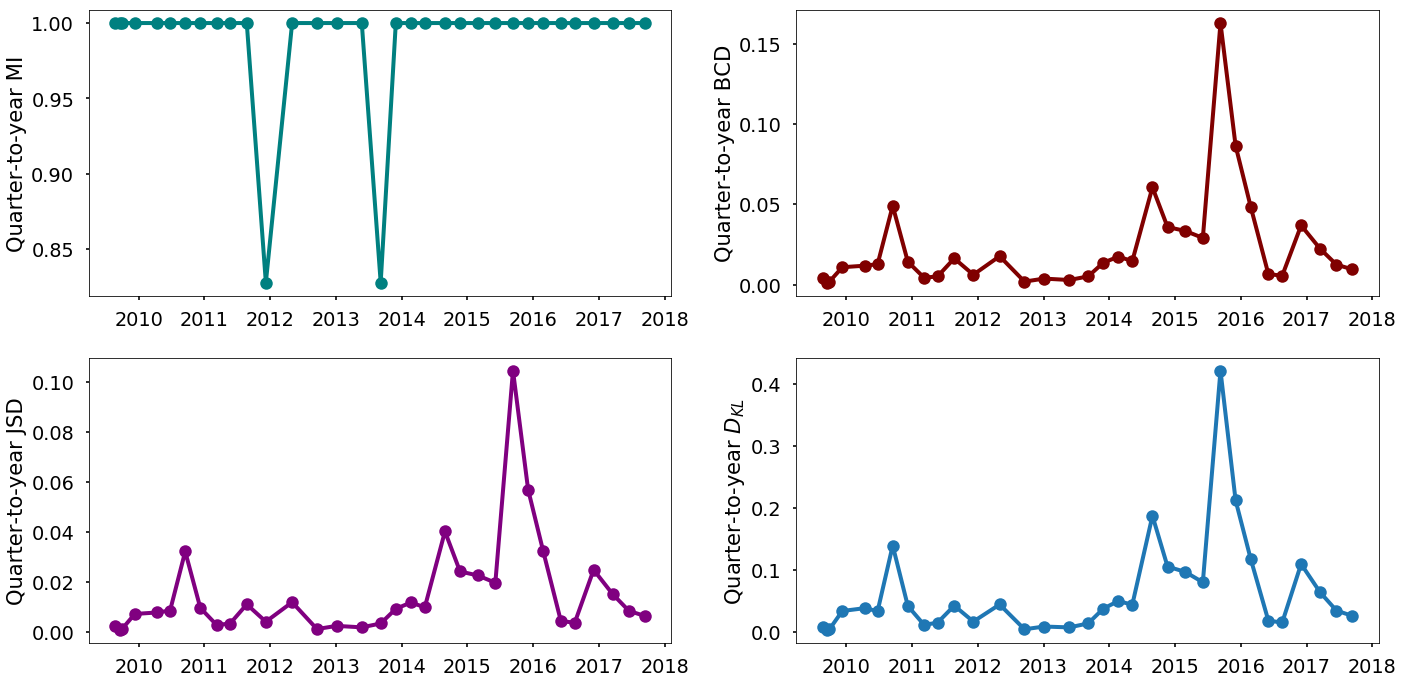

In [15]:
sns.set_context('poster',font_scale=1.2)

fig, axs = plt.subplots(2,2, figsize=(20,10))
axs = axs.reshape(axs.size,)

indices = table.start_of_wave[windowsize:]
ep = 0.001

# Normalised mutual Information
ax = axs[0]
ax.plot(indices, MIs[ep], '.-', c='teal', lw=4, ms=25)
ax.set_ylabel(r'Quarter-to-year MI')

#Bhattacharya distance
ax = axs[1]
ax.plot(indices, BCDs[ep], '.-', c='maroon', lw=4, ms=25)
ax.set_ylabel(r'Quarter-to-year BCD')

# JSDs:
ax = axs[2]
ax.plot(indices, JSDs[ep], '.-', c='purple', lw=4, ms=25)
ax.set_ylabel(r'Quarter-to-year JSD')
#ax.set_ylim(-0.1,1.1)

# Fill all zeros = False:
ax = axs[3]
ax.plot(indices, KLs_faz_False[ep], '.-', lw=4, ms=25)
ax.set_ylabel(r'Quarter-to-year $D_{KL}$')

# Fill all zeros = True:
#ax = axs[4]
#ax.plot(indices, KLs_faz_True[ep], '.-', c='#d62728')
#ax.set_ylabel(r'Quarter-to-year $D_{KL}$')
#ax.set_ylim(-0.1,2)

# Hamming distance
#ax = axs[5]
#ax.plot(indices, hammings[ep], '.-', c='g')
#ax.set_ylabel(r'Quarter-to-year Hamming')

plt.tight_layout()
plt.savefig('images/Superissues-divergence-quarter-to-year.png', dpi=200)
plt.show()

## 2 - Make proportion plots

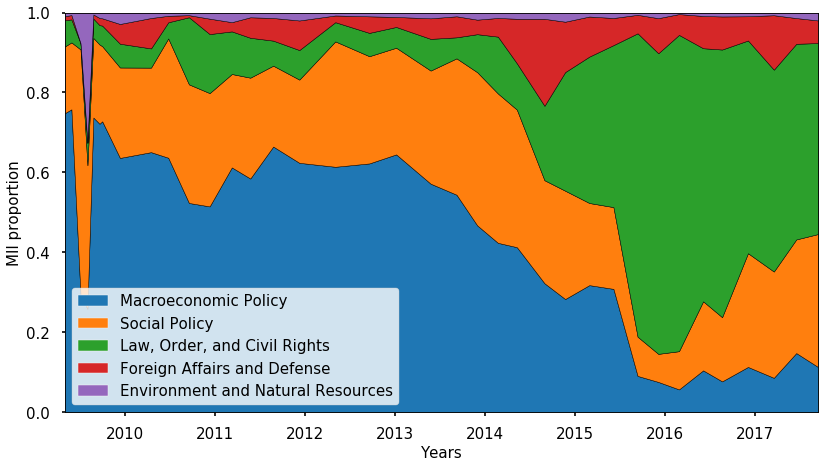

In [16]:
table = issues_over_time
M = table.loc[:, table.columns != 'start_of_wave'].as_matrix()

normM = []
for m in M:
    if sum(m)>0:
        normM += [ list(m/sum(m)) ]
    else:
        normM += [ list(m) ]
normM = np.array(normM)

y = normM.T.astype(float)
#x = range(len(y[0]))
x = table.start_of_wave.values

n_MIIs = 5

sums = np.array([ sum(i) for i in y ])
index_sort_all = np.argsort(sums)[::-1]
min_sum = sums[index_sort_all][n_MIIs-1]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
#           '#8c564b', '#e377c2', '#7f7f7f','#bcbd22', '#17becf']*5)[:len(y)]
#colors = [ colors[i] if i<n_MIIs else 'lightgrey' for i in range(len(y)) ]

fig, ax = plt.subplots(1, figsize=(12,7))

ax.stackplot(x, y[index_sort_all,:],          colors=colors, edgecolor='whitesmoke')
ax.stackplot(x, y[index_sort_all,:][:n_MIIs], colors=colors, edgecolor='k')

# Plot dashed lines indicating time points
#for ix in x:
#    ax.plot([ix,ix],[0,1],'--',c='w',lw=2)

ax.set_ylim(0,1)
ax.set_xlim(min(x),max(x))

keys = table.loc[:, table.columns != 'start_of_wave'].keys()

plt.legend(keys[index_sort_all][:n_MIIs], ncol=1, loc=3, fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('MII proportion',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig('images/Superissues-proportion-stackplot.png', dpi=200)
plt.show()